## EDA


#### Frequency of Reviews By Rating


<ipython-input-3-248d05a8710d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Score', data=train_data, palette=palette)


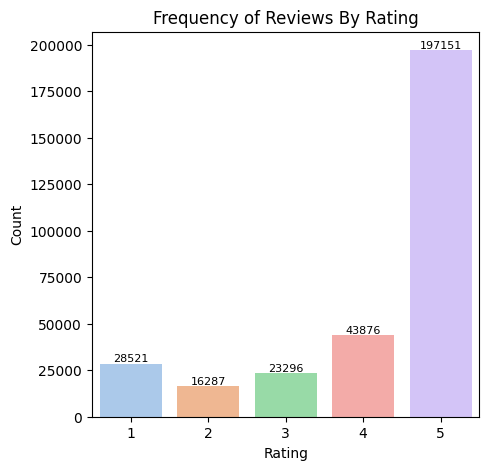

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv("train.csv")

# Visualize the distribution of ratings
plt.figure(figsize=(5, 5))
# Define a pastel palette that increases in hue from 1 to 5
palette = sns.color_palette("pastel", n_colors=5)

# Plot the count plot with the specified palette
ax = sns.countplot(x='Score', data=train_data, palette=palette)
plt.title('Frequency of Reviews By Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

# Get the current plot axes
ax = plt.gca()

# Loop through each patch (bar in the barplot) to get its position and height and put the text (count)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=8, color='black', ha='center', va='bottom')

plt.show()

#### Exploring the dataset


In [ ]:
print(train_data.head())

   Score                                               Text
0      5  I received this product early from the seller!...
1      5  *****<br />Numi's Collection Assortment Melang...
2      5  I was very careful not to overcook this pasta,...
3      5  Buying this multi-pack I was misled by the pic...
4      5  These bars are so good! I loved them warmed up...


In [ ]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309131 entries, 0 to 309130
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Score   309131 non-null  int64 
 1   Text    309131 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.7+ MB
None


In [ ]:
print(train_data.describe())

               Score
count  309131.000000
mean        4.180241
std         1.312151
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000


In [ ]:
#Average word count by Rating

import pandas as pd



# Calculate word count for each review(Text)
train_data['word_count'] = train_data['Text'].apply(lambda x: len(str(x).split()))

# Group by 'Rating' and calculate the average word count
average_word_count_by_rating = train_data.groupby('Score')['word_count'].mean()


print("Average Word Count by Rating:")
print(average_word_count_by_rating)

Average Word Count by Rating:
Score
1    82.733354
2    90.140971
3    95.951322
4    91.860265
5    73.859788
Name: word_count, dtype: float64


### Correlation Between Word Count and Rating Of Reviews

Average Word Count by Rating:
   Score  word_count
0      1   82.733354
1      2   90.140971
2      3   95.951322
3      4   91.860265
4      5   73.859788


<ipython-input-14-49b21710647a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Score', y='word_count', data=average_word_count_by_rating, palette=palette)


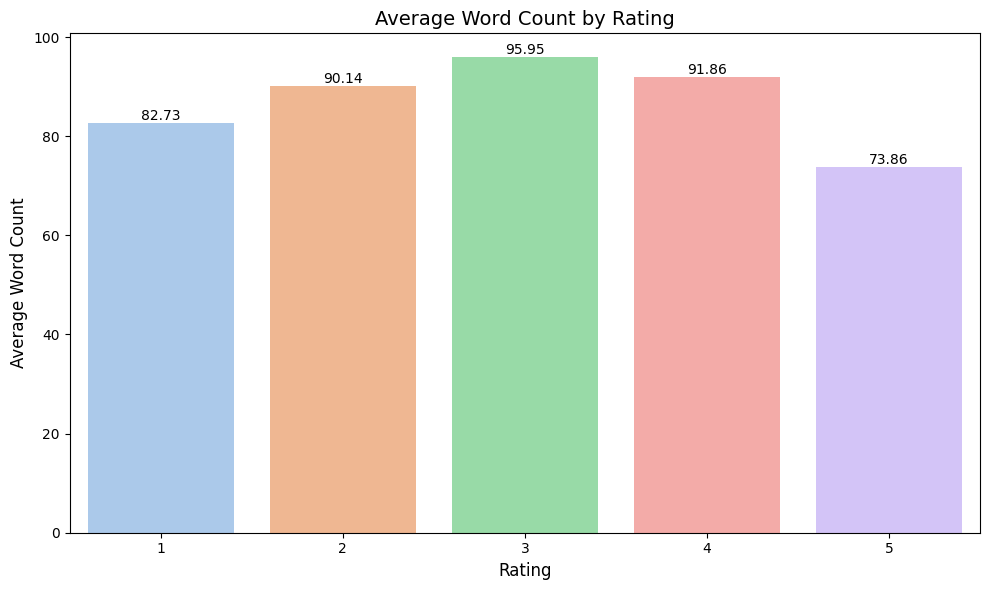

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming train_data is already defined and loaded

# Calculate word count for each review(Text)
train_data['word_count'] = train_data['Text'].apply(lambda x: len(str(x).split()))

# Group by Rating and calculate the average word count
average_word_count_by_rating = train_data.groupby('Score')['word_count'].mean().reset_index()
print("Average Word Count by Rating:")
print(average_word_count_by_rating)


# Setting up the plot
plt.figure(figsize=(10, 6))  # Smaller graph size
palette = sns.color_palette("pastel", n_colors=len(average_word_count_by_rating['Score']))

# Creating the bar plot
barplot = sns.barplot(x='Score', y='word_count', data=average_word_count_by_rating, palette=palette)

# Adding the text labels above the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     size = 10,
                     xytext = (0, 5),
                     textcoords = 'offset points')

# Setting the title and labels
plt.title('Average Word Count by Rating', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Average Word Count', fontsize=12)

plt.tight_layout()
plt.show()

This shows that the average word count for rating 5 is less than the average word count for rating 1 to 4, suggesting that the rating of 5 is more precise averaging approx 74 words.

In [ ]:
# Calculate word count for each review
train_data['word_count'] = train_data['Text'].apply(lambda x: len(str(x).split()))

# Get distribution of word counts by rating
distribution_by_rating = train_data.groupby('Score')['word_count'].describe(percentiles=[0.25, 0.5, 0.75, 0.95])

# Print the desired statistics
print(distribution_by_rating[['count', 'mean', 'std', 'min', '25%', '50%', '75%', '95%', 'max']])

          count       mean        std  min   25%   50%    75%    95%     max
Score                                                                       
1       28521.0  82.733354  76.646718  3.0  37.0  61.0  101.0  214.0  1751.0
2       16287.0  90.140971  79.779993  6.0  40.0  67.0  112.0  233.0  1612.0
3       23296.0  95.951322  89.100127  7.0  41.0  70.0  121.0  255.0  3432.0
4       43876.0  91.860265  87.705394  6.0  37.0  65.0  115.0  249.0  2061.0
5      197151.0  73.859788  72.045997  3.0  32.0  52.0   89.0  198.0  2520.0


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

class TextPreprocessor:
    def __init__(self, en_nlp=None):
        # Download NLTK resources
        nltk.download('punkt', quiet=True)
        nltk.download('stopwords', quiet=True)
        # Initialize stemmer and stopwords
        self.stemmer = PorterStemmer()
        self.stop_words = set(stopwords.words('english'))
        self.en_nlp = en_nlp

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [self.preprocess_text(text) for text in X]

    def preprocess_text(self, text):
        # Convert to lowercase
        text = text.lower()
        # Remove special characters
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Tokenize
        tokens = word_tokenize(text)
        # Remove stopwords
        tokens = [token for token in tokens if token not in self.stop_words]
        # Apply stemming
        tokens = [self.stemmer.stem(token) for token in tokens]
        # Join tokens back into text
        return ' '.join(tokens)

# Create preprocessor instance
preprocessor = TextPreprocessor()

# Apply to dataframe
train_data['Preprocessed_Review'] = train_data['Text'].apply(preprocessor.preprocess_text)

print("Original vs Preprocessed text:")
print(train_data[['Text', 'Preprocessed_Review']].head())

Original vs Preprocessed text:
                                                Text  \
0  I received this product early from the seller!...   
1  *****<br />Numi's Collection Assortment Melang...   
2  I was very careful not to overcook this pasta,...   
3  Buying this multi-pack I was misled by the pic...   
4  These bars are so good! I loved them warmed up...   

                                 Preprocessed_Review  
0  receiv product earli seller tastey great midda...  
1  br numi collect assort melang includesbr herba...  
2  care overcook pasta make sure take bite everi ...  
3  buy multipack misl pictur whole hazel nut anot...  
4  bar good love warm definit think great snack b...  


### Checking Anomalies

In [ ]:
import re
import nltk # no. to text coversion
import inflect
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.base import BaseEstimator, TransformerMixin
from bs4 import BeautifulSoup  # for HTML tag removal


# Function to check if a review contains only stop words
def contains_only_stopwords(text, stopwords):
    words = re.findall(r'\b\w+\b', str(text).lower())
    return all(word in stopwords for word in words)

# Function to check if a review contains only special characters
def contains_only_special_chars(text):
    return bool(re.match(r'^[\W_]+$', str(text)))

# Function to check if a review contains only digits
def contains_only_digits(text):
    return bool(re.match(r'^\d+$', str(text)))

# Function to check if a review is empty or filled with white spaces
def is_empty_or_space(text):
    return str(text).isspace() or not str(text)

# Function to check if a review contains HTML tags or URLs
def contains_html_or_url(text):
    return bool(re.findall(r'<[^>]+>', str(text))) or bool(re.findall(r'http\S+|www.\S+', str(text)))

def contains_only_html_or_url(text):
    # Check if text contains only HTML tags
    if bool(re.fullmatch(r'(<[^>]+>)+', str(text))):
        return True
    # Check if text is just a URL
    if bool(re.fullmatch(r'http\S+|www.\S+', str(text))):
        return True
    return False



stop_words_set = set(nltk.corpus.stopwords.words('english'))

# Count various anomalies in the data
missing_data_count = train_data['Text'].isnull().sum()
blanks_count = train_data['Text'].apply(is_empty_or_space).sum()
only_stop_words_count = train_data['Text'].apply(lambda x: contains_only_stopwords(x, stop_words_set)).sum()
only_special_chars_count = train_data['Text'].apply(contains_only_special_chars).sum()
only_digits_count = train_data['Text'].apply(contains_only_digits).sum()
html_or_url_count = train_data['Text'].apply(contains_html_or_url).sum()
only_html_or_url_count = train_data['Text'].apply(contains_only_html_or_url).sum()

asterisk_reviews_count = train_data['Text'].apply(lambda x: '*' in str(x)).sum()

print("Checking Data Anomalies.")
print("Reviews with Missing Data/ Nulls:", missing_data_count)
print("Reviews with Blanks/ Empty Spaces:", blanks_count)
print("Reviews with Only Stop Words:", only_stop_words_count)
print("Reviews with Only Special Characters:", only_special_chars_count)
print("Reviews with Only Digits:", only_digits_count)
print("Reviews with HTML Code/ URL within text:", html_or_url_count)
print("Reviews with only HTML Code/ URL:", only_html_or_url_count)
print("Reviews with containing '*':", asterisk_reviews_count)
print("-----------------------")


Checking Data Anomalies.
Reviews with Missing Data/ Nulls: 0
Reviews with Blanks/ Empty Spaces: 0
Reviews with Only Stop Words: 0
Reviews with Only Special Characters: 0
Reviews with Only Digits: 0
Reviews with HTML Code/ URL within text: 80712
Reviews with only HTML Code/ URL: 0
Reviews with containing '*': 3094
-----------------------


### Running Count Vectorizer and TFIDF on 6 different classifiers:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB  # Added import
from sklearn.linear_model import LogisticRegression  # Added import
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from gensim.models import KeyedVectors
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np


# Load preprocessed data
# pre_trim_data_v3 = pd.read_csv("train.csv")

# Fill missing values with empty strings
train_data['Preprocessed_Review'].fillna('', inplace=True)

# Split the data into features (X) and target (y)
X = train_data['Preprocessed_Review']
y = train_data['Score']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define a function to train, evaluate, and compute confusion matrix
def train_evaluate_confusion_matrix(vectorizer, classifier, X_train, X_test, y_train, y_test):
    # Vectorize the text
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    # Train the classifier
    classifier.fit(X_train_vectorized, y_train)

    # Evaluate the classifier
    y_pred = classifier.predict(X_test_vectorized)
    report = classification_report(y_test, y_pred)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    return report, cm

# Experiment with different vectorizers and classifiers
vectorizers_v3 = [CountVectorizer(), TfidfVectorizer()]
classifiers_v3 = [MultinomialNB(), LogisticRegression(max_iter=1000), DecisionTreeClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),KNeighborsClassifier()]

for vectorizer in vectorizers_v3:
    for classifier in classifiers_v3:
        print(f"Using {vectorizer.__class__.__name__} with {classifier.__class__.__name__}:")
        # Train and evaluate with the review data
        report, cm = train_evaluate_confusion_matrix(vectorizer, classifier, X_train, X_test, y_train, y_test)
        print("Classification Report:\n", report)
        print("Confusion Matrix:\n", cm)


<ipython-input-19-9b17730c3617>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Preprocessed_Review'].fillna('', inplace=True)


Using CountVectorizer with MultinomialNB:
Classification Report:
               precision    recall  f1-score   support

           1       0.58      0.57      0.58      5644
           2       0.31      0.02      0.04      3214
           3       0.33      0.10      0.16      4679
           4       0.35      0.26      0.30      8688
           5       0.76      0.93      0.84     39602

    accuracy                           0.69     61827
   macro avg       0.47      0.38      0.38     61827
weighted avg       0.63      0.69      0.64     61827

Confusion Matrix:
 [[ 3236    76   218   307  1807]
 [  787    67   381   510  1469]
 [  536    41   487  1297  2318]
 [  353    11   224  2262  5838]
 [  659    22   167  2086 36668]]
Using CountVectorizer with LogisticRegression:
Classification Report:
               precision    recall  f1-score   support

           1       0.61      0.60      0.61      5644
           2       0.29      0.17      0.21      3214
           3       0.36   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           1       0.92      0.00      0.00      5644
           2       0.00      0.00      0.00      3214
           3       0.00      0.00      0.00      4679
           4       0.33      0.00      0.00      8688
           5       0.64      1.00      0.78     39602

    accuracy                           0.64     61827
   macro avg       0.38      0.20      0.16     61827
weighted avg       0.54      0.64      0.50     61827

Confusion Matrix:
 [[   11     0     0     0  5633]
 [    1     0     0     1  3212]
 [    0     0     0     1  4678]
 [    0     0     0     1  8687]
 [    0     0     0     0 39602]]
Using CountVectorizer with KNeighborsClassifier:
Classification Report:
               precision    recall  f1-score   support

           1       0.36      0.19      0.25      5644
           2       0.17      0.04      0.07      3214
           3       0.21      0.06      0.10      4679
           4

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           1       0.88      0.01      0.02      5644
           2       0.00      0.00      0.00      3214
           3       0.00      0.00      0.00      4679
           4       0.33      0.00      0.00      8688
           5       0.64      1.00      0.78     39602

    accuracy                           0.64     61827
   macro avg       0.37      0.20      0.16     61827
weighted avg       0.54      0.64      0.50     61827

Confusion Matrix:
 [[   52     0     0     0  5592]
 [    6     0     0     0  3208]
 [    1     0     0     0  4678]
 [    0     0     0     1  8687]
 [    0     1     0     2 39599]]
Using TfidfVectorizer with LogisticRegression:
Classification Report:
               precision    recall  f1-score   support

           1       0.63      0.63      0.63      5644
           2       0.36      0.13      0.19      3214
           3       0.39      0.23      0.29      4679
           4  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           1       0.79      0.00      0.01      5644
           2       0.00      0.00      0.00      3214
           3       0.00      0.00      0.00      4679
           4       0.00      0.00      0.00      8688
           5       0.64      1.00      0.78     39602

    accuracy                           0.64     61827
   macro avg       0.29      0.20      0.16     61827
weighted avg       0.48      0.64      0.50     61827

Confusion Matrix:
 [[   15     0     0     0  5629]
 [    4     0     0     0  3210]
 [    0     0     0     0  4679]
 [    0     0     0     0  8688]
 [    0     0     0     0 39602]]
Using TfidfVectorizer with KNeighborsClassifier:
Classification Report:
               precision    recall  f1-score   support

           1       0.47      0.24      0.32      5644
           2       0.16      0.04      0.07      3214
           3       0.20      0.07      0.10      4679
           4

### Table comparison:

In [ ]:
# Create the dataframe for accuracy scores of all 6 classifiers
df_accuracy = pd.DataFrame([
    ['69%', '64%'],
    ['71%', '72%'],
    ['60%', '59%'],
    ['68%', '68%'],
    ['64%', '64%'],
    ['63%', '63%']
], index=pd.Index(['MultinomialNB', 'Logistic Regression', 'DecisionTreeClassifier', 'GradientBoostingClassifier', 'AdaBoostClassifier', 'KNeighborsClassifier']),
   columns=pd.MultiIndex.from_product([['CountVectorizer', 'TFIDF']]))
df_accuracy.style


s_accuracy = df_accuracy.style
# s_f1 = df_f1.style
# Add table styles
cell_hover = {'selector': 'td:hover', 'props': [('background-color', '#ffffb3')]}
index_names = {'selector': '.index_name', 'props': 'font-style: italic; color: darkgrey; font-weight: normal;'}
headers = {'selector': 'th:not(.index_name)', 'props': 'background-color: #000066; color: white; text-align: center'}
s_accuracy.set_table_styles([cell_hover, index_names, headers])
s_accuracy.set_table_styles([
        {'selector': '.col_heading', 'props': 'font-size: 22px; text-align: center; border: none;'},
    {'selector': '.row_heading', 'props': 'font-size: 22px; text-align: center; border: none;'},
    {'selector': '.data', 'props': 'font-size: 22px; text-align: center; border: none;'},
    {'selector': 'td.row1.col0',  'props': 'background-color: green; color: white'},
    {'selector': 'td.row1.col1',  'props': 'background-color: green; color: white'},
], overwrite=False)
s_accuracy.set_caption("Comparison of classifiers performance - Accuracy") \
    .set_table_styles([{
        'selector': 'caption',
        'props': 'caption-side: top; font-size: 20px; color: black; font-weight: bold; text-align: center; margin-bottom: 30px'
    }], overwrite=False)

# s_accuracy.format('{:.2f}')

,"('CountVectorizer',)","('TFIDF',)"
MultinomialNB,69%,64%
Logistic Regression,71%,72%
DecisionTreeClassifier,60%,59%
GradientBoostingClassifier,68%,68%
AdaBoostClassifier,64%,64%
KNeighborsClassifier,63%,63%


Since <b>Logistic Regression</b> performed the best, we will explore other vectorizer techniques such as <b>count vectorizer with n-grams. TFIDF with n-grams, fastText vectorizer and HashingVectorizer</b> on <b>Logistic Regression</b>.

## Vectorizer with n-grams:


## Count Vectorizer on Logistic regression: (unigram, bigram, trigram):

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import joblib

# Fill missing values with empty strings
train_data['Preprocessed_Review'].fillna('', inplace=True)

# Split the data into features (X) and target (y)
X = train_data['Preprocessed_Review']
y = train_data['Score']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to train, evaluate, compute confusion matrix, and save model
def train_evaluate_confusion_matrix_save_model(vectorizer, classifier, X_train, X_test, y_train, y_test, ngram_range, model_save_path):
    # Vectorize the text
    vectorizer.set_params(ngram_range=ngram_range)
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    # Train the classifier
    classifier.fit(X_train_vectorized, y_train)

    # Save the trained model
    joblib.dump(classifier, model_save_path)

    # Evaluate the classifier
    y_pred = classifier.predict(X_test_vectorized)
    report = classification_report(y_test, y_pred)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    return report, cm

# Example usage with different n-gram ranges
ngram_ranges = [(1, 1), (1, 2), (1, 3)]  # Unigram, bigram, and trigram
model_save_paths = ["trained_model_LR_CV_unigram.pkl", "trained_model_LR_CV_bigram.pkl", "trained_model_LR_CV_trigram.pkl"]

for ngram_range, model_save_path in zip(ngram_ranges, model_save_paths):
    vectorizer_v9 = CountVectorizer()
    classifier_v9 = LogisticRegression(max_iter=1000)

    print(f"Using {vectorizer_v9.__class__.__name__} with {classifier_v9.__class__.__name__} and n-gram range {ngram_range}:")
    #print(f"Using {vectorizer_v9.__class.name} with {classifier_v9.__class.name_} and n-gram range {ngram_range}:")
    # Train, evaluate, and save the model
    report, cm = train_evaluate_confusion_matrix_save_model(vectorizer_v9, classifier_v9, X_train, X_test, y_train, y_test, ngram_range, model_save_path)
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", cm)
    print("Model saved at:", '/Users/Pratibha/Downloads/Checkpoint_CW2')
    print()

<ipython-input-13-940538a038fb>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Preprocessed_Review'].fillna('', inplace=True)


Using CountVectorizer with LogisticRegression and n-gram range (1, 1):
Classification Report:
               precision    recall  f1-score   support

           1       0.61      0.60      0.61      5644
           2       0.29      0.17      0.21      3214
           3       0.36      0.24      0.29      4679
           4       0.40      0.21      0.28      8688
           5       0.79      0.93      0.85     39602

    accuracy                           0.71     61827
   macro avg       0.49      0.43      0.45     61827
weighted avg       0.66      0.71      0.67     61827

Confusion Matrix:
 [[ 3396   509   322   144  1273]
 [  879   545   552   234  1004]
 [  528   401  1127   784  1839]
 [  223   184   668  1850  5763]
 [  532   228   490  1570 36782]]
Model saved at: /Users/Pratibha/Downloads/Checkpoint_CW2

Using CountVectorizer with LogisticRegression and n-gram range (1, 2):
Classification Report:
               precision    recall  f1-score   support

           1       0.64

## TF-IDF Vectorizer on Logistic regression: (unigram, bigram, trigram):

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import joblib

# Fill missing values with empty strings
train_data['Preprocessed_Review'].fillna('', inplace=True)

# Split the data into features (X) and target (y)
X = train_data['Preprocessed_Review']
y = train_data['Score']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to train, evaluate, compute confusion matrix, and save model
def train_evaluate_confusion_matrix_save_model(vectorizer, classifier, X_train, X_test, y_train, y_test, ngram_range, model_save_path):
    # Vectorize the text
    vectorizer.set_params(ngram_range=ngram_range)
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    # Train the classifier
    classifier.fit(X_train_vectorized, y_train)

    # Save the trained model
    #joblib.dump(classifier, model_save_path)

    # Evaluate the classifier
    y_pred = classifier.predict(X_test_vectorized)
    report = classification_report(y_test, y_pred)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    return report, cm

# Example usage with different n-gram ranges and TF-IDF vectorization
ngram_ranges = [(1, 1), (1, 2), (1, 3)]  # Unigram, bigram, and trigram
model_save_paths = ["trained_model_LR_TFIDF_unigram.pkl", "trained_model_LR_TFIDF_bigram.pkl", "trained_model_LR_TFIDF_trigram.pkl"]

for ngram_range, model_save_path in zip(ngram_ranges, model_save_paths):
    vectorizer_v10 = TfidfVectorizer()
    classifier_v10 = LogisticRegression(max_iter=1000)

    print(f"Using {vectorizer_v10.__class__.__name__} with {classifier_v10.__class__.__name__} and n-gram range {ngram_range}:")
    # Train, evaluate, and save the model
    report, cm = train_evaluate_confusion_matrix_save_model(vectorizer_v10, classifier_v10, X_train, X_test, y_train, y_test, ngram_range, model_save_path)
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", cm)
    #print("Model saved at:", model_save_path)
    print()

<ipython-input-10-9d6b5f10d761>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Preprocessed_Review'].fillna('', inplace=True)


Using TfidfVectorizer with LogisticRegression and n-gram range (1, 1):
Classification Report:
               precision    recall  f1-score   support

           1       0.63      0.64      0.63      5644
           2       0.36      0.13      0.19      3214
           3       0.39      0.24      0.30      4679
           4       0.44      0.21      0.28      8688
           5       0.78      0.95      0.86     39602

    accuracy                           0.72     61827
   macro avg       0.52      0.43      0.45     61827
weighted avg       0.67      0.72      0.68     61827

Confusion Matrix:
 [[ 3584   306   270   124  1360]
 [  885   428   557   199  1145]
 [  508   280  1109   796  1986]
 [  212   101   568  1799  6008]
 [  497    90   305  1137 37573]]

Using TfidfVectorizer with LogisticRegression and n-gram range (1, 2):
Classification Report:
               precision    recall  f1-score   support

           1       0.66      0.65      0.65      5644
           2       0.42   

## HashingVectorizer with Logistic regression:


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

# Fill missing values with empty strings
train_data['Preprocessed_Review'].fillna('', inplace=True)

# Split the data into features (X) and target (y)
X = train_data['Preprocessed_Review']
y = train_data['Score']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to train, evaluate, and compute confusion matrix
def train_evaluate_confusion_matrix(vectorizer, classifier, X_train, X_test, y_train, y_test):
    # Vectorize the text
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    # Train the classifier
    classifier.fit(X_train_vectorized, y_train)

    # Evaluate the classifier
    y_pred = classifier.predict(X_test_vectorized)
    report = classification_report(y_test, y_pred)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    return report, cm

# Experiment with different vectorizers and classifiers
vectorizers_v2 = [HashingVectorizer()]
classifiers_v2 = [LogisticRegression(max_iter=1000)]

for vectorizer in vectorizers_v2:
    for classifier in classifiers_v2:
        print(f"Using {vectorizer.__class__.__name__} with {classifier.__class__.__name__}:")
        # Train and evaluate with the truncated review data
        report, cm = train_evaluate_confusion_matrix(vectorizer, classifier, X_train, X_test, y_train, y_test)
        print("Classification Report:\n", report)
        print("Confusion Matrix:\n", cm)


<ipython-input-4-fe7aa8165f73>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Preprocessed_Review'].fillna('', inplace=True)


Using HashingVectorizer with LogisticRegression:
Classification Report:
               precision    recall  f1-score   support

           1       0.63      0.64      0.63      5644
           2       0.36      0.11      0.17      3214
           3       0.39      0.23      0.29      4679
           4       0.45      0.20      0.28      8688
           5       0.78      0.95      0.86     39602

    accuracy                           0.72     61827
   macro avg       0.52      0.43      0.45     61827
weighted avg       0.67      0.72      0.68     61827

Confusion Matrix:
 [[ 3584   260   267   116  1417]
 [  882   368   572   193  1199]
 [  513   246  1090   773  2057]
 [  226    75   557  1735  6095]
 [  504    72   280  1007 37739]]


### FastText Vectorizer with Logistic regression:

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 16.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
!unzip wiki-news-300d-1M.vec.zip


--2025-03-28 18:35:47--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.96, 3.163.189.51, 3.163.189.108, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘wiki-news-300d-1M.vec.zip’

wiki-news-300d-1M.v 100%[===================>] 650.22M   275MB/s    in 2.4s    

2025-03-28 18:35:50 (275 MB/s) - ‘wiki-news-300d-1M.vec.zip’ saved [681808098/681808098]

Archive:  wiki-news-300d-1M.vec.zip
  inflating: wiki-news-300d-1M.vec   


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
from gensim.models import KeyedVectors
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class FastTextVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, ft_model):
        self.ft_model = ft_model
        self.vector_size = ft_model.vector_size

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.array([self.transform_text(text) for text in X])

    def transform_text(self, text):
        words = text.split()
        vectors = [self.ft_model[word] for word in words if word in self.ft_model]
        if vectors:
            return np.mean(vectors, axis=0)
        else:
            return np.zeros(self.vector_size)


# Load the FastText model with a limit
ft_model = KeyedVectors.load_word2vec_format("wiki-news-300d-1M.vec")

# Fill missing values with empty strings
train_data['Preprocessed_Review'].fillna('', inplace=True)

# Split the data into features (X) and target (y)
X = train_data['Preprocessed_Review']
y = train_data['Score']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to train, evaluate, and compute confusion matrix
def train_evaluate_confusion_matrix(vectorizer, classifier, X_train, X_test, y_train, y_test):
    # Vectorize the text
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    # Train the classifier
    classifier.fit(X_train_vectorized, y_train)

    # Evaluate the classifier
    y_pred = classifier.predict(X_test_vectorized)
    report = classification_report(y_test, y_pred)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    return report, cm

# Experiment with FastTextVectorizer and Logistic Regression classifier
vectorizer = FastTextVectorizer(ft_model)
classifier = LogisticRegression(max_iter=1000)

print(f"Using FastTextVectorizer with {classifier.__class__.__name__}:")
# Train and evaluate with the truncated review data
report, cm = train_evaluate_confusion_matrix(vectorizer, classifier, X_train, X_test, y_train, y_test)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)


Using FastTextVectorizer with LogisticRegression:
Classification Report:
               precision    recall  f1-score   support

           1       0.53      0.43      0.47      5644
           2       0.33      0.03      0.05      3214
           3       0.32      0.09      0.14      4679
           4       0.38      0.06      0.10      8688
           5       0.70      0.96      0.81     39602

    accuracy                           0.67     61827
   macro avg       0.45      0.31      0.32     61827
weighted avg       0.59      0.67      0.59     61827

Confusion Matrix:
 [[ 2399    64   149    54  2978]
 [  657    95   260    77  2125]
 [  468    62   429   286  3434]
 [  287    27   278   512  7584]
 [  728    36   215   429 38194]]


In [ ]:
# Create the dataframe for accuracy scores of two vectorizers
df_accuracy = pd.DataFrame([
    ['72%', '67%'],
], index=pd.Index(['Logistic Regression']),
   columns=pd.MultiIndex.from_product([['HashingVectorizer', 'FastText Vectorizer']]))
df_accuracy.style


s_accuracy = df_accuracy.style
#s_f1 = df_f1.style
# Add table styles
cell_hover = {'selector': 'td:hover', 'props': [('background-color', '#ffffb3')]}
index_names = {'selector': '.index_name', 'props': 'font-style: italic; color: darkgrey; font-weight: normal;'}
headers = {'selector': 'th:not(.index_name)', 'props': 'background-color: #000066; color: white; text-align: center'}
s_accuracy.set_table_styles([cell_hover, index_names, headers])
s_accuracy.set_table_styles([
        {'selector': '.col_heading', 'props': 'font-size: 22px; text-align: center; border: none;'},
    {'selector': '.row_heading', 'props': 'font-size: 22px; text-align: center; border: none;'},
    {'selector': '.data', 'props': 'font-size: 22px; text-align: center; border: none;'},
    {'selector': 'td.row0.col0',  'props': 'background-color: green; color: white'},
#     {'selector': 'td.row1.col1',  'props': 'background-color: green; color: white'},
], overwrite=False)
s_accuracy.set_caption("Comparison of HashingVectorizer and FastText Vectorizer using Logistic Regression") \
    .set_table_styles([{
        'selector': 'caption',
        'props': 'caption-side: top; font-size: 20px; color: black; font-weight: bold; text-align: center; margin-bottom: 30px'
    }], overwrite=False)

# s_accuracy.format('{:.2f}')

,"('HashingVectorizer',)","('FastText Vectorizer',)"
Logistic Regression,72%,67%


## Vector Space Model for sequential models:

## Word2Vec model:

### Creates Word2Vec using only minimal processing - CBOW:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag

import logging
from gensim.models import word2vec
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors

# Load preprocessed data
data = pd.read_csv("train.csv")

# Extracting features (X) and labels (y)
X = data['Text'].astype(str)
y = data['Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False, \
             ):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case

    if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]

    if stemming==True: # stemming
#         stemmer = PorterStemmer()
        stemmer = SnowballStemmer('english')
        words = [stemmer.stem(w) for w in words]

    if split_text==True:  # split text
        return (words)

    return( " ".join(words))

X_train_cleaned = []
X_test_cleaned = []

for d in X_train:
    X_train_cleaned.append(cleanText(d))
print('Show a cleaned review in the training set : \n',  X_train_cleaned[10])

for d in X_test:
    X_test_cleaned.append(cleanText(d))

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

def parseSent(review, tokenizer, remove_stopwords=False):
    '''
    Parse text into sentences
    '''
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(cleanText(raw_sentence, remove_stopwords, split_text=True))
    return sentences


# Parse each review in the training set into sentences
sentences = []
for review in X_train_cleaned:
    sentences += parseSent(review, tokenizer)

print('%d parsed sentence in the training set\n'  %len(sentences))
print('Show a parsed sentence in the training set : \n',  sentences[10])

<ipython-input-3-d1635ef6c106>:31: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a filename than HTML or XML.

If you meant to use Beautiful Soup to parse the contents of a file on disk, then something has gone wrong. You should open the file first, using code like this:

    filehandle = open(your filename)

You can then feed the open filehandle into Beautiful Soup instead of using the filename.

However, if you want to parse some data that happens to look like a filename, then nothing has gone wrong: you are using Beautiful Soup correctly, and this warning is spurious and can be filtered. To make this warning go away, run this code before calling the BeautifulSoup constructor:

    from bs4 import MarkupResemblesLocatorWarning
    import warnings

    warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)
    
  text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html


Show a cleaned review in the training set : 
 we were house sitting for our neighbors the past couple of weeks and found this item that we thought might come in handy especially with their pups or dog and pup don t know the age limit for canines anyway chef michael s grilled sirloin literally drove them wild their owners feed them purina dog chow but once we opened the bag and pour a bowl full for each they dove right in and went scurrying to the bag when we put it down something that didn t happen with purina when they came back our neighbor ricardo commented on how much the dogs seems to prefer the chef michael s now i don t know what they re paying for the purina or if the chef michael s would be a treat here and there but one thing is certain the chef michael s grilled sirloin made quite an impression on those dogs they really really love the taste of this stuff
247304 parsed sentence in the training set

Show a parsed sentence in the training set : 
 ['we', 'were', 'house', 'sitti

In [ ]:
# Fit parsed sentences to Word2Vec model
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',level=logging.INFO)

num_features = 300  #embedding dimension
min_word_count = 10
num_workers = 4
context = 10
downsampling = 1e-3

print("Training Word2Vec model ...\n")
w2v = Word2Vec(sentences, workers=num_workers, vector_size=num_features, min_count = min_word_count,
                 window = context, sample = downsampling)
w2v.init_sims(replace=True)
w2v.save("w2v_300features_10minwordcounts_10context") #save trained word2vec model

print("Number of words in the vocabulary list : %d \n" %len(w2v.wv.index_to_key)) #4016
print("Show first 10 words in the vocalbulary list  vocabulary list: \n", w2v.wv.index_to_key[0:10])

Training Word2Vec model ...



<ipython-input-4-ca7b7e26e529>:13: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v.init_sims(replace=True)


Number of words in the vocabulary list : 20599 

Show first 10 words in the vocalbulary list  vocabulary list: 
 ['the', 'i', 'and', 'a', 'it', 'to', 'of', 'is', 'this', 'in']


### Creates Word2Vec model using minimal preprocessing - SkipGram:


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag

import logging
from gensim.models import word2vec
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors

# Load preprocessed data
data = pd.read_csv("train.csv")

# Extracting features (X) and labels (y)
X = data['Text'].astype(str)
y = data['Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def cleanText(raw_text, remove_stopwords=False, stemming=False, lemmatization = False, split_text=False, \
             ):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case

    if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]

    if stemming==True: # stemming
#         stemmer = PorterStemmer()
        stemmer = SnowballStemmer('english')
        words = [stemmer.stem(w) for w in words]

    if lemmatization:  # Lemmatization
        lemmatized_tokens = []
        for token in en_nlp(" ".join(words)):
            if token.is_alpha and not token.is_stop:
                pos_tag = token.pos_
                wn_pos_tag = get_wordnet_pos(pos_tag)
                if wn_pos_tag is not None:
                    lemmatized_tokens.append(token.lemma_)
                else:
                    lemmatized_tokens.append(token.text)
        words = lemmatized_tokens

    if split_text==True:  # split text
        return (words)

    return( " ".join(words))

def get_wordnet_pos(pos):
        if pos.startswith('ADJ'):
            return 'a'  # Adjective
        elif pos.startswith('ADV'):
            return 'r'  # Adverb
        elif pos.startswith('NOUN'):
            return 'n'  # Noun
        elif pos.startswith('VERB'):
            return 'v'  # Verb
        else:
            return None

X_train_cleaned = []
X_test_cleaned = []

for d in X_train:
    X_train_cleaned.append(cleanText(d))

for d in X_test:
    X_test_cleaned.append(cleanText(d))

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

def parseSent(review, tokenizer, remove_stopwords=False):
    '''
    Parse text into sentences
    '''
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(cleanText(raw_sentence, remove_stopwords, split_text=True))
    return sentences


# Parse each review in the training set into sentences
sentences = []
for review in X_train_cleaned:
    sentences += parseSent(review, tokenizer)



<ipython-input-5-84020faeb0e6>:31: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a filename than HTML or XML.

If you meant to use Beautiful Soup to parse the contents of a file on disk, then something has gone wrong. You should open the file first, using code like this:

    filehandle = open(your filename)

You can then feed the open filehandle into Beautiful Soup instead of using the filename.

However, if you want to parse some data that happens to look like a filename, then nothing has gone wrong: you are using Beautiful Soup correctly, and this warning is spurious and can be filtered. To make this warning go away, run this code before calling the BeautifulSoup constructor:

    from bs4 import MarkupResemblesLocatorWarning
    import warnings

    warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)
    
  text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html


### Creates Word2Vec using minimal and Stemming processing - CBOW:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag
import spacy

import logging
from gensim.models import Word2Vec

# Load preprocessed data
data = pd.read_csv("train.csv")

# Extracting features (X) and labels (y)
X = data['Text'].astype(str)
y = data['Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load spaCy English language model
en_nlp = spacy.load("en_core_web_sm")
def cleanText(raw_text, remove_stopwords=False, stemming=False, lemmatization = False, split_text=False, \
             ):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case

    if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]

    if stemming==True: # stemming
#         stemmer = PorterStemmer()
        stemmer = SnowballStemmer('english')
        words = [stemmer.stem(w) for w in words]

    if lemmatization:  # Lemmatization
        lemmatized_tokens = []
        for token in en_nlp(" ".join(words)):
            if token.is_alpha and not token.is_stop:
                pos_tag = token.pos_
                wn_pos_tag = get_wordnet_pos(pos_tag)
                if wn_pos_tag is not None:
                    lemmatized_tokens.append(token.lemma_)
                else:
                    lemmatized_tokens.append(token.text)
        words = lemmatized_tokens

    if split_text==True:  # split text
        return (words)

    return( " ".join(words))

def get_wordnet_pos(pos):
        if pos.startswith('ADJ'):
            return 'a'  # Adjective
        elif pos.startswith('ADV'):
            return 'r'  # Adverb
        elif pos.startswith('NOUN'):
            return 'n'  # Noun
        elif pos.startswith('VERB'):
            return 'v'  # Verb
        else:
            return None

def parseSent(review, tokenizer, remove_stopwords=False):
    '''
    Parse text into sentences
    '''
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(cleanText(raw_sentence, remove_stopwords=False, stemming=True, lemmatization = False, split_text=True))
    return sentences

X_train_cleaned = []
X_test_cleaned = []

for d in X_train:
    X_train_cleaned.append(cleanText(d))
print('Show a cleaned review in the training set : \n',  X_train_cleaned[10])

# for d in X_test:
#     X_test_cleaned.append(cleanText(d))

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

# Parse each review in the training set into sentences
sentences = []
for review in X_train_cleaned:
    sentences += parseSent(review, tokenizer)

# sentences = []
# for review in X_test_cleaned:
#     sentences += parseSent(review, tokenizer)
num_features = 300  #embedding dimension
min_word_count = 10
num_workers = 4
context = 10
downsampling = 1e-3

print("Training Word2Vec model ...\n")
w2v = Word2Vec(sentences, workers=num_workers, vector_size=num_features, min_count = min_word_count,
                 window = context, sample = downsampling)
w2v.init_sims(replace=True)
w2v.save("w2v_model") #save trained word2vec model

print("Number of words in the vocabulary list : %d \n" %len(w2v.wv.index_to_key)) #4016
print("Show first 10 words in the vocalbulary list  vocabulary list: \n", w2v.wv.index_to_key[0:10])

<ipython-input-3-0a1b00fb6d0b>:32: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a filename than HTML or XML.

If you meant to use Beautiful Soup to parse the contents of a file on disk, then something has gone wrong. You should open the file first, using code like this:

    filehandle = open(your filename)

You can then feed the open filehandle into Beautiful Soup instead of using the filename.

However, if you want to parse some data that happens to look like a filename, then nothing has gone wrong: you are using Beautiful Soup correctly, and this warning is spurious and can be filtered. To make this warning go away, run this code before calling the BeautifulSoup constructor:

    from bs4 import MarkupResemblesLocatorWarning
    import warnings

    warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)
    
  text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html


Show a cleaned review in the training set : 
 we were house sitting for our neighbors the past couple of weeks and found this item that we thought might come in handy especially with their pups or dog and pup don t know the age limit for canines anyway chef michael s grilled sirloin literally drove them wild their owners feed them purina dog chow but once we opened the bag and pour a bowl full for each they dove right in and went scurrying to the bag when we put it down something that didn t happen with purina when they came back our neighbor ricardo commented on how much the dogs seems to prefer the chef michael s now i don t know what they re paying for the purina or if the chef michael s would be a treat here and there but one thing is certain the chef michael s grilled sirloin made quite an impression on those dogs they really really love the taste of this stuff
Training Word2Vec model ...



<ipython-input-3-0a1b00fb6d0b>:114: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v.init_sims(replace=True)


Number of words in the vocabulary list : 13981 

Show first 10 words in the vocalbulary list  vocabulary list: 
 ['the', 'i', 'and', 'a', 'it', 'to', 'of', 'is', 'this', 'in']


### Creates Word2Vec model using minimal and stemming preprocessing - SkipGram:

In [ ]:
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag
import spacy

# Load preprocessed data
data = pd.read_csv("train.csv")

# Extracting features (X) and labels (y)
X = data['Text'].astype(str)
y = data['Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load spaCy English language model
en_nlp = spacy.load("en_core_web_sm")
def cleanText(raw_text, remove_stopwords=False, stemming=False, lemmatization = False, split_text=False, \
             ):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case

    if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]

    if stemming==True: # stemming
#         stemmer = PorterStemmer()
        stemmer = SnowballStemmer('english')
        words = [stemmer.stem(w) for w in words]

    if lemmatization:  # Lemmatization
        lemmatized_tokens = []
        for token in en_nlp(" ".join(words)):
            if token.is_alpha and not token.is_stop:
                pos_tag = token.pos_
                wn_pos_tag = get_wordnet_pos(pos_tag)
                if wn_pos_tag is not None:
                    lemmatized_tokens.append(token.lemma_)
                else:
                    lemmatized_tokens.append(token.text)
        words = lemmatized_tokens

    if split_text==True:  # split text
        return (words)

    return( " ".join(words))

def get_wordnet_pos(pos):
        if pos.startswith('ADJ'):
            return 'a'  # Adjective
        elif pos.startswith('ADV'):
            return 'r'  # Adverb
        elif pos.startswith('NOUN'):
            return 'n'  # Noun
        elif pos.startswith('VERB'):
            return 'v'  # Verb
        else:
            return None

def parseSent(review, tokenizer, remove_stopwords=False):
    '''
    Parse text into sentences
    '''
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(cleanText(raw_sentence, remove_stopwords=False, stemming=True, lemmatization = False, split_text=True))
    return sentences

X_train_cleaned = []
X_test_cleaned = []

for d in X_train:
    X_train_cleaned.append(cleanText(d))
print('Show a cleaned review in the training set : \n',  X_train_cleaned[10])

# for d in X_test:
#     X_test_cleaned.append(cleanText(d))

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

# Parse each review in the training set into sentences
sentences = []
for review in X_train_cleaned:
    sentences += parseSent(review, tokenizer)

# sentences = []
# for review in X_test_cleaned:
#     sentences += parseSent(review, tokenizer)
num_features = 300  #embedding dimension
min_word_count = 10
num_workers = 4
context = 10
downsampling = 1e-3

print("Training Word2Vec model ...\n")
w2v = Word2Vec(sentences, workers=num_workers, vector_size=num_features, min_count = min_word_count,
                 window = context, sample = downsampling, sg=1)
w2v.init_sims(replace=True)
w2v.save("word2vec_models_SG") #save trained word2vec model

print("Number of words in the vocabulary list : %d \n" %len(w2v.wv.index_to_key)) #4016
print("Show first 10 words in the vocalbulary list  vocabulary list: \n", w2v.wv.index_to_key[0:10])

<ipython-input-4-c54a98a2f67a>:22: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a filename than HTML or XML.

If you meant to use Beautiful Soup to parse the contents of a file on disk, then something has gone wrong. You should open the file first, using code like this:

    filehandle = open(your filename)

You can then feed the open filehandle into Beautiful Soup instead of using the filename.

However, if you want to parse some data that happens to look like a filename, then nothing has gone wrong: you are using Beautiful Soup correctly, and this warning is spurious and can be filtered. To make this warning go away, run this code before calling the BeautifulSoup constructor:

    from bs4 import MarkupResemblesLocatorWarning
    import warnings

    warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)
    
  text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html


Show a cleaned review in the training set : 
 we were house sitting for our neighbors the past couple of weeks and found this item that we thought might come in handy especially with their pups or dog and pup don t know the age limit for canines anyway chef michael s grilled sirloin literally drove them wild their owners feed them purina dog chow but once we opened the bag and pour a bowl full for each they dove right in and went scurrying to the bag when we put it down something that didn t happen with purina when they came back our neighbor ricardo commented on how much the dogs seems to prefer the chef michael s now i don t know what they re paying for the purina or if the chef michael s would be a treat here and there but one thing is certain the chef michael s grilled sirloin made quite an impression on those dogs they really really love the taste of this stuff
Training Word2Vec model ...



KeyboardInterrupt: 

### Creates Word2Vec using minimal and Lemmatizer processing - CBOW:


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag
import spacy

# Load spaCy English language model
en_nlp = spacy.load("en_core_web_sm")
import logging
from gensim.models import word2vec
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors

# Load preprocessed data
data = pd.read_csv("train.csv")

# Extracting features (X) and labels (y)
X = data['Text'].astype(str)
y = data['Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def cleanText(raw_text, remove_stopwords=False, lemmatization=False, split_text=False, \
             ):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case

    if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]

#     if stemming==True: # stemming
# #         stemmer = PorterStemmer()
#         stemmer = SnowballStemmer('english')
#         words = [stemmer.stem(w) for w in words]

    if lemmatization:  # Lemmatization
        lemmatized_tokens = []
        for token in en_nlp(" ".join(words)):
            if token.is_alpha and not token.is_stop:
                pos_tag = token.pos_
                wn_pos_tag = get_wordnet_pos(pos_tag)
                if wn_pos_tag is not None:
                    lemmatized_tokens.append(token.lemma_)
                else:
                    lemmatized_tokens.append(token.text)
        words = lemmatized_tokens
    if split_text==True:  # split text
        return (words)

    return( " ".join(words))

def get_wordnet_pos(pos):
        if pos.startswith('ADJ'):
            return 'a'  # Adjective
        elif pos.startswith('ADV'):
            return 'r'  # Adverb
        elif pos.startswith('NOUN'):
            return 'n'  # Noun
        elif pos.startswith('VERB'):
            return 'v'  # Verb
        else:
            return None
X_train_cleaned = []
X_test_cleaned = []

for d in X_train:
    X_train_cleaned.append(cleanText(d))
print('Show a cleaned review in the training set : \n',  X_train_cleaned[10])

for d in X_test:
    X_test_cleaned.append(cleanText(d))

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

def parseSent(review, tokenizer, remove_stopwords=False):
    '''
    Parse text into sentences
    '''
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(cleanText(raw_sentence, remove_stopwords, lemmatization=True, split_text=True))
    return sentences


# Parse each review in the training set into sentences
sentences = []
for review in X_train_cleaned:
    sentences += parseSent(review, tokenizer)

print('%d parsed sentence in the training set\n'  %len(sentences))
print('Show a parsed sentence in the training set : \n',  sentences[10])

<ipython-input-5-2a7dc87ee2a9>:34: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a filename than HTML or XML.

If you meant to use Beautiful Soup to parse the contents of a file on disk, then something has gone wrong. You should open the file first, using code like this:

    filehandle = open(your filename)

You can then feed the open filehandle into Beautiful Soup instead of using the filename.

However, if you want to parse some data that happens to look like a filename, then nothing has gone wrong: you are using Beautiful Soup correctly, and this warning is spurious and can be filtered. To make this warning go away, run this code before calling the BeautifulSoup constructor:

    from bs4 import MarkupResemblesLocatorWarning
    import warnings

    warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)
    
  text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html


Show a cleaned review in the training set : 
 we were house sitting for our neighbors the past couple of weeks and found this item that we thought might come in handy especially with their pups or dog and pup don t know the age limit for canines anyway chef michael s grilled sirloin literally drove them wild their owners feed them purina dog chow but once we opened the bag and pour a bowl full for each they dove right in and went scurrying to the bag when we put it down something that didn t happen with purina when they came back our neighbor ricardo commented on how much the dogs seems to prefer the chef michael s now i don t know what they re paying for the purina or if the chef michael s would be a treat here and there but one thing is certain the chef michael s grilled sirloin made quite an impression on those dogs they really really love the taste of this stuff


KeyboardInterrupt: 

# Part - 4: Model training, selection and hyperparameter tuning and evaluation:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from gensim.models import KeyedVectors
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
from joblib import dump
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

import os

# Create directory for saving models
os.makedirs("./grid_search_models", exist_ok=True)


# Fill missing values with empty strings
train_data['Preprocessed_Review'] = train_data['Preprocessed_Review'].fillna('')

# Split the data into features (X) and target (y)
X = train_data['Preprocessed_Review']
y = train_data['Score']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of classifiers with their associated parameters
classifiers = [
    {
        'classifier': [MultinomialNB()],
        'classifier__alpha': [0.1, 0.5, 1.0],  # Smoothing parameter for MultinomialNB
    },
    {
        'classifier': [LogisticRegression(max_iter=1000)],
        'classifier__C': [0.01, 0.1, 1.0, 10.0],  # Regularization parameter for LogisticRegression
        'classifier__penalty': ['l1', 'l2'],  # Penalty term for LogisticRegression
    },
    {
        'classifier': [GradientBoostingClassifier()],
        'classifier__n_estimators': [50, 100, 200],  # The number of boosting stages to perform
        'classifier__max_depth': [3, 5, 7],  # Maximum depth of the individual trees
    },
]
max_df_values = [0.2, 0.5, 1.0]
vectorizers = []
for max_df in max_df_values:
    vectorizers.extend([
        (CountVectorizer(ngram_range=(1, 1), max_df=max_df), f"CountVectorizer_Unigram_max_df_{max_df}"),
        (CountVectorizer(ngram_range=(1, 2), max_df=max_df), f"CountVectorizer_Bigram_max_df_{max_df}"),
        (CountVectorizer(ngram_range=(1, 3), max_df=max_df), f"CountVectorizer_Trigram_max_df_{max_df}"),
        (TfidfVectorizer(ngram_range=(1, 1), max_df=max_df), f"TfidfVectorizer_Unigram_max_df_{max_df}"),
        (TfidfVectorizer(ngram_range=(1, 2), max_df=max_df), f"TfidfVectorizer_Bigram_max_df_{max_df}"),
        (TfidfVectorizer(ngram_range=(1, 3), max_df=max_df), f"TfidfVectorizer_Trigram_max_df_{max_df}"),
    ])

# Create an empty list to store the results
results = []

# Perform grid search for each combination of classifier and vectorizer
for classifier_config in classifiers:
    for vectorizer, vectorizer_name in vectorizers:
        print("Classifier:", type(classifier_config['classifier'][0]).__name__)
        print("vectorizer", vectorizer_name)
        # Create a pipeline with the current vectorizer and classifier
        pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier_config['classifier']),
        ])

        # Create GridSearchCV object
        grid_search = GridSearchCV(pipeline, classifier_config, cv=2, scoring='accuracy', verbose=3)

        # Perform grid search
        grid_search.fit(X_train, y_train)

        # Save the best model
        best_model = grid_search.best_estimator_
        model_filename = f"./grid_search_models/{vectorizer_name}_{type(classifier_config['classifier'][0]).__name__}_best_model.joblib"
        dump(best_model, model_filename)

        # Get best parameters and best score
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
        test_score = grid_search.score(X_test, y_test)

        # Store the results
        result = {
            'vectorizer': vectorizer_name,
            'classifier': type(classifier_config['classifier'][0]).__name__,
            'best_params': best_params,
            'best_score': best_score,
            'test_score': test_score,
        }
        results.append(result)


# Print the results
for result in results:
    print("===================================================")
    print(f"Vectorizer: {result['vectorizer']}, Classifier: {result['classifier']}")
    print("Best parameters:", result['best_params'])
    print("Best cross-validation score:", result['best_score'])
    print("Test set accuracy:", result['test_score'])
    print()

    # Print classification report and confusion matrix
    print("Classification Report:")
    y_pred = result['best_model'].predict(X_test)
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("===================================================")


Classifier: MultinomialNB
vectorizer CountVectorizer_Unigram_max_df_0.2
Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV 1/2] END classifier=MultinomialNB(), classifier__alpha=0.1;, score=0.663 total time=   8.4s
[CV 2/2] END classifier=MultinomialNB(), classifier__alpha=0.1;, score=0.663 total time=   7.4s
[CV 1/2] END classifier=MultinomialNB(), classifier__alpha=0.5;, score=0.680 total time=   7.8s
[CV 2/2] END classifier=MultinomialNB(), classifier__alpha=0.5;, score=0.679 total time=   8.3s
[CV 1/2] END classifier=MultinomialNB(), classifier__alpha=1.0;, score=0.683 total time=   6.8s
[CV 2/2] END classifier=MultinomialNB(), classifier__alpha=1.0;, score=0.684 total time=   8.4s
Classifier: MultinomialNB
vectorizer CountVectorizer_Bigram_max_df_0.2
Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV 1/2] END classifier=MultinomialNB(), classifier__alpha=0.1;, score=0.690 total time=  25.5s
[CV 2/2] END classifier=MultinomialNB(), classifier__alpha=0.1;, sc

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
8 fits failed out of a total of 16.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last

Classifier: LogisticRegression
vectorizer CountVectorizer_Bigram_max_df_0.2
Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV 1/2] END classifier=LogisticRegression(max_iter=1000), classifier__C=0.01, classifier__penalty=l1;, score=nan total time=  15.2s
[CV 2/2] END classifier=LogisticRegression(max_iter=1000), classifier__C=0.01, classifier__penalty=l1;, score=nan total time=  15.5s
[CV 1/2] END classifier=LogisticRegression(max_iter=1000), classifier__C=0.01, classifier__penalty=l2;, score=0.709 total time= 2.6min
[CV 2/2] END classifier=LogisticRegression(max_iter=1000), classifier__C=0.01, classifier__penalty=l2;, score=0.709 total time= 2.7min
[CV 1/2] END classifier=LogisticRegression(max_iter=1000), classifier__C=0.1, classifier__penalty=l1;, score=nan total time=  15.1s
[CV 2/2] END classifier=LogisticRegression(max_iter=1000), classifier__C=0.1, classifier__penalty=l1;, score=nan total time=  15.7s
[CV 1/2] END classifier=LogisticRegression(max_iter=1000), class

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
8 fits failed out of a total of 16.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last